In [7]:
### Imports des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

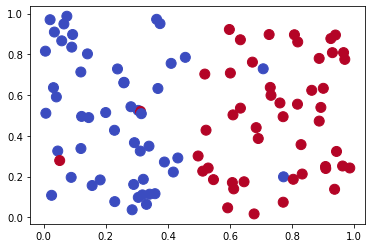

In [8]:
### Simulation de données en deux dimensions séparables linéairement
np.random.seed(42)
# Distribution uniforme sur deux dimensions
X = np.random.rand(100, 2) 
# L'étiquette dépend de la valeur de X sur la deuxième dimension
y = X[:, 0] > 0.5  
lines_noise = np.random.choice(range(len(y)), 5)
y[lines_noise] = 1 - y[lines_noise]
plt.scatter(X[:, 0],X[:, 1], c = y, cmap = 'coolwarm', s = 100)

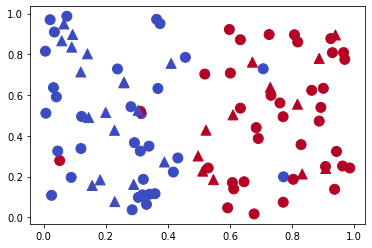

In [9]:
### Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'coolwarm', s = 100)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = 'coolwarm', s = 100, marker = '^')

In [16]:
import matplotlib.pyplot as plt

def plot_boundary(clf, X, y):
    h = 0.002
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, cmap = 'cool', alpha = 0.75)

    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'coolwarm', s = 100)
    #plt.title('score : ' + str(clf.score(X,y)))
    plt.xlabel('$X^1$')
    plt.ylabel('$X^2$')

# Réglage des hyper-paramètres en fonction de accuracy

Résultats de validation sur l'ensemble des paramètres:
GridSearchCV(estimator=SVC(),
             param_grid={'C': array([ 0.1,  1. , 10. ]), 'kernel': ['linear']},
             scoring='accuracy') {'mean_fit_time': array([0.00120049, 0.00100098, 0.00039983]), 'std_fit_time': array([4.00168618e-04, 9.84180805e-07, 4.89687385e-04]), 'mean_score_time': array([0.000598  , 0.        , 0.00019999]), 'std_score_time': array([0.00048828, 0.        , 0.00039997]), 'param_C': masked_array(data=[0.1, 1.0, 10.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1, 'kernel': 'linear'}, {'C': 1.0, 'kernel': 'linear'}, {'C': 10.0, 'kernel': 'linear'}], 'split0_test_score': array([0.5       , 0.85714286, 0.92857143]), 'split1_test_

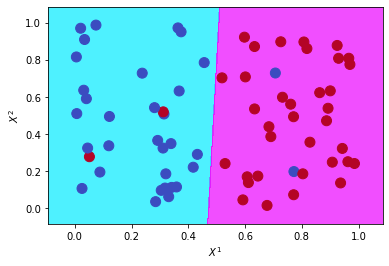

In [17]:
### Procédure d'estimation d'un SVM linéaire pour différentes valeurs de C
### -> GridSearchCV

parameters = {'kernel': ['linear'], 'C': np.logspace(-1, 1, 3)}
score = 'accuracy' #'recall'

print("# Réglage des hyper-paramètres en fonction de %s" % score)
print()

clf = GridSearchCV(SVC(), parameters, scoring=score)
clf.fit(X_train, y_train)

print("Résultats de validation sur l'ensemble des paramètres:")
print(clf, clf.cv_results_)        
print("Meilleurs paramètres:")
print(clf.best_params_)
print("Frontière de décision:")
plot_boundary(clf, X_train, y_train)
plt.show()

In [21]:
### Résultats de test pour les meilleurs paramètres

print("Rapport de classification sur l'ensemble de test:")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Rapport de classification sur l'ensemble de test:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        18
        True       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



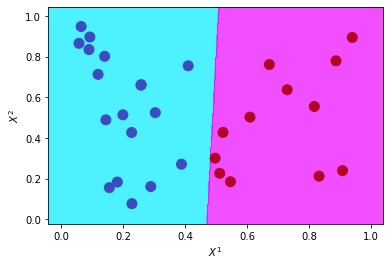

In [22]:
plot_boundary(clf, X_test, y_test)
plt.show()